<a href="https://colab.research.google.com/github/xaximpvp2/master/blob/main/codigo_aula19_topico_adicional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecendo dígitos de 0 e 9 escritos à mão

## Pacotes:

Importaremos aqui os seguintes pacotes:
- [numpy](https://numpy.org/) é o pacote fundamental para computação científica com Python
- [matplotlib](http://matplotlib.org) é uma biblioteca popular para plotar gráficos em Python
- [tensorflow](https://www.tensorflow.org/) é uma plataforma popular para Aprendizado de Máquina em Python

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
%matplotlib inline
# O comando '%matplotlib inline' serve para que os gráficos sejam plotados imediatamente após a célula atual

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


### Definição do Problema

Nessa atividade de programação, você irá usar uma rede neural para reconhecer dígitos de 0 a 9 escritos à mão (problema de classificação multi-classes).

### Conjunto de dados

Começaremos essa atividade carregando os dados

- O conjunto de dados contém 5000 amostras de treinamento de dígitos $^1$, de 0 a 9.  

    - Cada amostra de treinamento é uma imagem de um dígito em escala cinza com tamanho 20 pixels por 20 pixels
        - Cada pixel é representado por um número que indica a intensidade de escala cinza naquele ponto
        - A matriz 20 por 20 de pixels é "desenrolada" num vetor com 400 elementos
        - Cada exemplo de treinamento se torna uma linha na nossa matriz de dados `X`, que possui 400 caracteristicas
        - Isso nos leva à matriz X (5000 x 400), onde cada linha é um exemplo de uma imagem de dígito escrito à mão.

$$X =
\left(\begin{array}{cc}
--- (x^{(1)}) --- \\
--- (x^{(2)}) --- \\
\vdots \\
--- (x^{(m=5000)}) ---
\end{array}\right)$$

- O conjunto de dados de treinamento também possui vetor `y` com dimensões 5000 x 1, que contém os rótulos corretos para as amostras que estão em `X`
    - `y = 0` indica um dígito `0`, `y = 1` indica um dígito `1`, e assim por diante.

$^1$<sub> Este é um subconjunto do conjunto de dados de dígitos escritos à mão disponível em  (http://yann.lecun.com/exdb/mnist/)</sub>

In [2]:
# Carregando dados
X = np.load("X.npy")
y = np.load("y.npy")


#### Olhando as variáveis

Vamos agora nos familiarizar com o conjunto de dados.
- Uma boa forma para começar é dar print de cada variável e ver o que ela contém

O código abaixo dá print dos elementos contidos nas variáveis `X` e `y`

In [3]:
print ('O primeiro elemento de X é: ', X[0])

O primeiro elemento de X é:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e

In [4]:
print ('O primeiro elemento de y é: ', y[0,0])
print ('O último elemento de y é: ', y[-1,0])

O primeiro elemento de y é:  0
O último elemento de y é:  9



#### Apenas checando as dimensões das nossas variáveis

Uma outra forma de nos familiarizarmos com os nossos dados é verificar suas dimensões.

In [5]:
print ('O shape de X é: ' + str(X.shape))
print ('O shape de y é: ' + str(y.shape))

O shape de X é: (5000, 400)
O shape de y é: (5000, 1)


#### Visualizando os dados

- Na célula abaixo, o código seleciona aleatoriamente 64 linhas da matriz `X`, mapeia cada linha de volta para uma imagem em escala cinza 20 por 20 e mostra as imagens todas juntas.
- O rótulo de cada imagem é mostrado acima dela

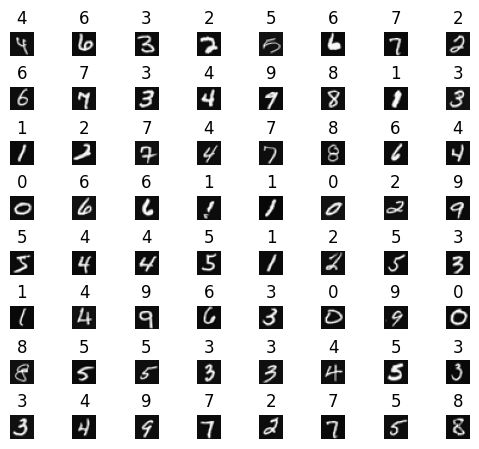

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Você não precisa modificar nada nessa célula

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Seleciona índices aleatoriamente
    random_index = np.random.randint(m)

    # Seleciona as linhas que correspondem aos índices e refaz o shape da imagem usando a função `reshape`
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # Mostra a imagem
    ax.imshow(X_random_reshaped, cmap='gray')

    # Mostra o rótulo da imagem acima da mesma
    ax.set_title(y[random_index,0])
    ax.set_axis_off()


### Representação do modelo

- A rede neural que você irá usar deve possuir 3 camadas do tipo `dense`.
  - lembre-se que nossas entradas são os valores dos pixels das imagens
  - Uma vez que as imagens são de tamanho $20\times20$, temos um total de $400$ características de entrada
    

- A rede neural deve ter $25$ unidades na camada 1, $15$ unidades na camada 2 e $10$ unidades de saída na camada 3 (uma unidade para cada classe).

    - Lembre-se que as dimensões dos parâmetros de cada camada são conforme a seguir:
        - Se a rede possui numa camada com $s_{out}$ unidades e $s_{in}$ entradas, então
            - $W$ terá dimensão $s_{in} \times s_{out}$.
            - $b$ será um vetor com $s_{out}$ elementos
  
    - Portanto, os shapes de `W` e `b` são:
        - Camada 1: O shape de `W1` é (400, 25) e o shape de `b1` é (25,)
        - Camada 2: O shape de `W2` é (25,15) e o shape de `b2` é (15,)
        - Camada 3: O shape de `W3` é (15,10) e o shape de `b3` é (10,)
        
>**OBS:** O vetor de bias `b` poderia ser representado como uma array 1-D (n,) ou 2-D (n,1). Tensorflow usa uma representação 1-D e iremos manter essa convenção.               


### Implementação do modelo usando Tensorflow


Abaixo, usamos as funções [Sequential model](https://keras.io/guides/sequential_model/) e [Dense Layer](https://keras.io/api/layers/core_layers/dense/) do Keras para construir a rede desejada.

In [7]:
tf.random.set_seed(1234) # para resultados consistentes
modelo = Sequential(
    [
        tf.keras.Input(shape=(400,)),    # especificando a dimensão do vetor de entrada (não é obrigatório especificar)
        tf.keras.layers.Dense(25, activation="relu"),
        tf.keras.layers.Dense(15, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
    ], name = "meu_modelo"   # Na definição do nome do modelo, não pode haver espaços em branco
)


In [8]:
modelo.summary()

Model: "meu_modelo"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 25)                  │          10,025 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

A contagem de parâmetros acima corresponde ao número de elementos w + b do modelo, conforme detalhado abaixo.

In [9]:
num_params_camada1 = 400 * 25 + 25  # parâmetros W1 + parâmetros b1
num_params_camada2 = 25 * 15 + 15   # parâmetros W2 + parâmetros b2
num_params_camada3 = 15 * 10 + 10     # parâmetros W3 + parâmetros b3
print("Número param. camada 1 = ", num_params_camada1, ", Número param. camada 2 = ", num_params_camada2, ",  Número param. camada 3 = ", num_params_camada3 )

Número param. camada 1 =  10025 , Número param. camada 2 =  390 ,  Número param. camada 3 =  160


Vamos examinar agora com cuidado os pesos para verificar que o Tensorflow produziu as mesmas dimensões que nós havíamos calculado anteriormente.

In [10]:
[camada1, camada2, camada3] = modelo.layers

In [11]:
#### Examinando os shapes dos pesos
W1,b1 = camada1.get_weights()
W2,b2 = camada2.get_weights()
W3,b3 = camada3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


O código a seguir define uma função de perda e roda o método do gradiente para ajustar os pesos do modelo aos dados de treinamento (detalhes específicos acerca desses comandos ainda serão abordados).

In [12]:
modelo.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

historico = modelo.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.9042
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6837
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4526
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3638
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3089
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2708
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2429
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2217
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2039
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1900
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1775
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1664
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1562
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1473
Epoch 15/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

#### Lotes e épocas

Conforme já mencionado em atividades anteriores, para tornar o processo de treinamento do modelo mais eficiente computacionalmente, ao invés de usarmos, em cada iteração, todas as amostras do conjunto de dados de treinamento (Método do Gradiente Clássico), o Tensorflow usa o método do gradiente em mini-lotes (ou, em inglês, mini-batch gradient descent).

No método do gradiente em mini-lotes, o conjunto de dados de treinamento é dividido em 'lotes de amostras'. O tamanho padrão de cada lote no Tensorflow é de 32 exemplos de treinamento.
Como há 5000 amostras no nosso conjunto de dados, isso significa que teremos 5000/32=157 lotes.
Assim, em cada iteração, o método do gradiente opera em cima de apenas um desses lotes de amostras, passando para o lote seguinte na iteração seguinte.

Ao passar por todos os 157 mini-lotes de amostra, significa que método do gradiente completou sua primeira 'varredura' em cima dos dados. O número de varreduras que é feita em cima de todos os dados é também chamado de 'número de épocas'.


Com o comando `compile` acima, note que o número de épocas foi definido como sendo 40. Isso significa que o conjunto completo de dados foi 'varrido' 40 vezes no processo de treinamento do modelo. Durante o treinamento do modelo, o progresso de treinamento é mostrado conforme abaixo:
```
Epoch 3/40
157/157 [==============================] - 0s 1ms/step - loss: 2.2770
```
A primeira linha, `Epoch 1/40`, descreve a época na qual o modelo encontra-se rodando atualmente.

#### Perda (custo)

Nas nossas primeiras aulas, aprendemos que é importante monitorar o custo ao longo do processo de treinamento de um modelo.
Idealmente, o custo irá decrescer conforme o número de iterações do algoritmo aumenta. O Tensorflow se refere ao custo pelo termo `perda`. Acima, você pode verificar o custo para cada época a medida que o comando `modelo.fit` estava sendo executado. O Método [.fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model) retorna uma variedade de métricas, incluindo o custo. Essa informação pode ser capturada por meio do atributo `history` presente na variável de saída `historico` acima. Abaixo nós mostramos a evolução do custo ao longo das épocas de treinamento

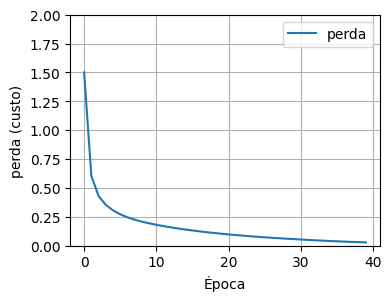

In [13]:
fig,ax = plt.subplots(1,1, figsize = (4,3))
ax.plot(historico.history['loss'], label='perda')
ax.set_ylim([0, 2])
ax.set_xlabel('Época')
ax.set_ylabel('perda (custo)')
ax.legend()
ax.grid(True)
plt.show()

Para rodar o modelo para uma amostra para fazer uma previsão, usamos a função do Keras [`predict`](https://www.tensorflow.org/api_docs/python/tf/keras/Model). A entrada da função `predict` é uma array 2-D, por isso usamos a função reshape abaixo.

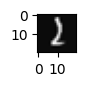

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
 Prevendo um 2: 
[[1.4315340e-07 7.0169918e-02 8.1960100e-01 5.5510523e-03 4.9174105e-07
  6.9166854e-06 1.1171047e-06 1.0466204e-01 2.2219583e-06 5.2376349e-06]]
 Índice com o maior valor: 2


In [14]:
imagem_numero_2 = X[1015]   # exemplo de imagem com dígito 2
fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
imagem_numero_2_reshaped = imagem_numero_2.reshape((20,20)).T
ax.imshow(imagem_numero_2_reshaped, cmap='gray')
plt.show()

previsao = modelo.predict(imagem_numero_2.reshape(1,400))  # um 0


print(f" Prevendo um 2: \n{previsao}")
print(f" Índice com o maior valor: {np.argmax(previsao)}")

O maior valor de saída da rede neural é previsao[2], indicando que a rede está classificando a imagem como sendo de um dígito 2. Se o problema requer apenas uma seleção, isso já é o suficiente e a função [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) já resolve o problema.

In [16]:
probabilidades = previsao

print(f" probabilidades: \n{probabilidades*100}")
print(f"Soma das probabilidades: {np.sum(probabilidades)*100:0.3f}")
print(f"Conclusão: a rede neural está nos dizendo que trata-se de um 2 com  {100*probabilidades[0,2]} % de certeza")

 probabilidades: 
[[1.4315340e-05 7.0169916e+00 8.1960098e+01 5.5510521e-01 4.9174105e-05
  6.9166854e-04 1.1171047e-04 1.0466204e+01 2.2219583e-04 5.2376348e-04]]
Soma das probabilidades: 100.000
Conclusão: a rede neural está nos dizendo que trata-se de um 2 com  81.96009993553162 % de certeza


Vamos agora comparar as previsões com os valores alvo para 64 dígitos aleatoriamente selecionados.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

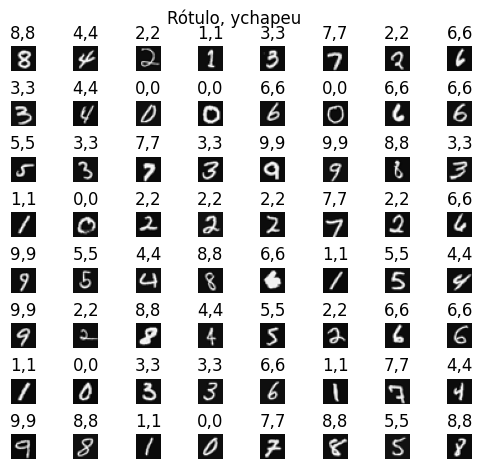

In [17]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5)) # figura com 8x8=64 gráficos
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat): # passando por todos os 64 gráficos da figura
    # Seleciona aleatoriamente um índice entre 0 e m
    random_index = np.random.randint(m)

    # abaixo selecionamos a linha que corresponde ao índice e fazemos o reshape da imagem
    X_random_reshaped = X[random_index].reshape((20,20)).T

    # mostramos a imagem
    ax.imshow(X_random_reshaped, cmap='gray')

    # Previsão usando a nossa rede neural
    probabilidades   = modelo.predict(X[random_index].reshape(1,400))
    yhat         = np.argmax(probabilidades)

    # Mostra o rótulo e a previsão sobre a imagem
    ax.set_title(f"{y[random_index,0]},{yhat}")
    ax.set_axis_off()
fig.suptitle("Rótulo, ychapeu", fontsize=12)
plt.show()

Abaixo verificamos quantos dígitos foram classificados de forma errada e calculamos a taxa de acerto.

In [18]:
Probabilidades = modelo.predict(X) # calcula a saída da rede neural para todos os exemplos de treinamento

print("maior probabilidade:", np.max(Probabilidades), "     menor probabilidade:", np.min(Probabilidades))

Yhat = np.argmax(Probabilidades,axis=1).reshape(-1,1)

qtdade_digitos_errados = np.sum(Yhat!=y)
qtdade_digitos         = X.shape[0]
print(f"{qtdade_digitos_errados} imagens classificadas incorretamente de um total de {qtdade_digitos} imagens")

taxa_acerto = np.mean((Yhat==y)*100)
print(f"taxa de acerto (%): {taxa_acerto}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
maior probabilidade: 0.99999994      menor probabilidade: 4.196377e-33
21 imagens classificadas incorretamente de um total de 5000 imagens
taxa de acerto (%): 99.58


Abaixo buscamos novamente pelos dígitos classificados incorretamente e mostramos eles.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


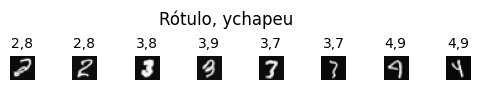

In [19]:
indices = np.where(Yhat!=y)[0]
if len(indices) == 0:
    print("Nenhuma imagem classificada incorretamente!")
else:
    cnt = min(8, len(indices)) # mostraremos no máximo 8 dígitos classificados incorretamente.
    fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
    fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]

    for i in range(cnt):
        j = indices[i]
        X_reshaped = X[j].reshape((20,20)).T

        # Mostrando a imagem
        ax[i].imshow(X_reshaped, cmap='gray')

        # Fazendo previsão com a nossa rede neural
        probabilidades = modelo.predict(X[j].reshape(1,400))
        yhat           = np.argmax(probabilidades)

        # Mostrando o rótulo real e estimado acima da figura
        ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
        ax[i].set_axis_off()
        fig.suptitle("Rótulo, ychapeu", fontsize=12)


### Parabéns!

Você construiu e utilizou uma rede neural para classificação multi-classe!